In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10000,n_classes=2, n_clusters_per_class=1,n_features=10,random_state=10,weights=[0.99])

In [64]:
print((y==1).sum())
print((y==0).sum())

144
9856


<Axes: xlabel='0', ylabel='1'>

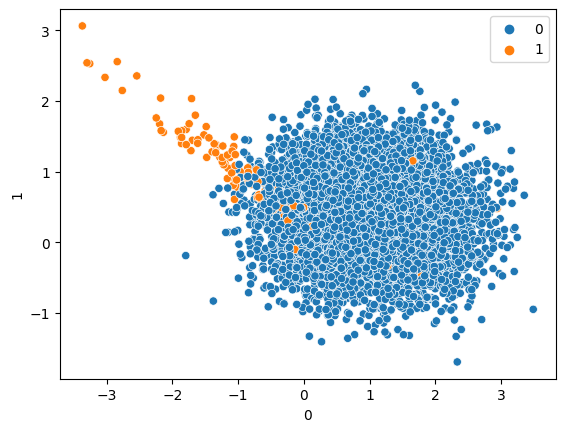

In [65]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=25)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penality = ['l1', 'l2','elasticnet']
c_value=[100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
class_weights=[ {0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [68]:
class_weights

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [69]:
params = dict( class_weight=class_weights,penalty=penality,C=c_value,solver=solver)

# gridSearchcv

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(param_grid=params, estimator=model,cv=cv,scoring='accuracy')

In [71]:
grid.fit(x_train,y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [72]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [73]:
grid.best_score_

0.989857142857143

In [74]:
ypred= grid.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_pred=ypred,y_true=y_test)
print(score)
cm = confusion_matrix(y_pred=ypred,y_true=y_test)
print(cm)
print(classification_report(y_test,ypred))

0.9893333333333333
[[2957    0]
 [  32   11]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2957
           1       1.00      0.26      0.41        43

    accuracy                           0.99      3000
   macro avg       0.99      0.63      0.70      3000
weighted avg       0.99      0.99      0.99      3000

